In [5]:
#loading the neccessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
#Reading the files
train_data = pd.read_csv('/kaggle/input/titanic-data/train.csv')#loading training data
test_data = pd.read_csv('/kaggle/input/titanic-data/test.csv')#loading test data
train_data.head(5)#Display the first rows of train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# EDA - Exploratory Data Analytics

In [7]:
train_data.columns #returns column names

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
print(train_data.shape) #Returns the dimensions of the training set
print(test_data.shape) #Returns the dimenstions of the testing set

(891, 12)
(418, 11)


In [9]:
train_data.describe(include="O")#Returns summary statistics of categorical values

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [10]:
train_data.describe() #Returns the summary statistics of all numerical values

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Visualizations

<Axes: xlabel='Survived', ylabel='count'>

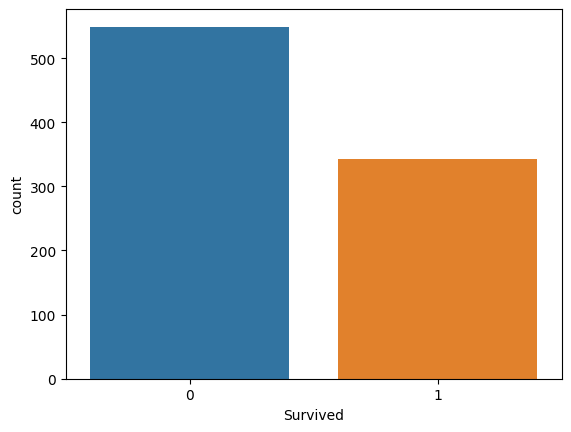

In [11]:
# Count plot of number of passengers that survived. 
sns.countplot(data=train_data, x='Survived')

Text(0, 0.5, 'Count')

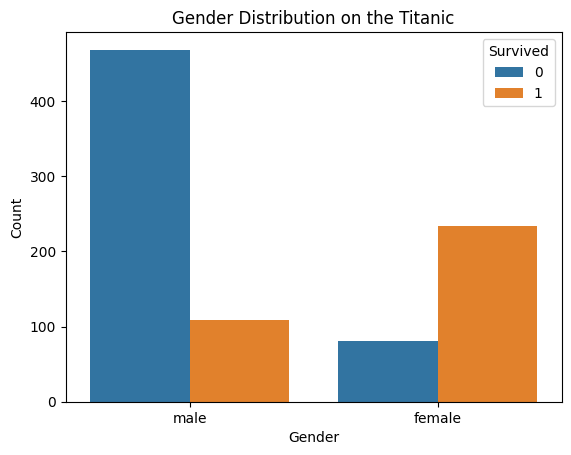

In [12]:
#Countplot to see the gender distribution among the passengers
sns.countplot(data=train_data, x='Sex', hue='Survived')
plt.title("Gender Distribution on the Titanic")
plt.xlabel('Gender')
plt.ylabel('Count')

<Axes: xlabel='Pclass', ylabel='count'>

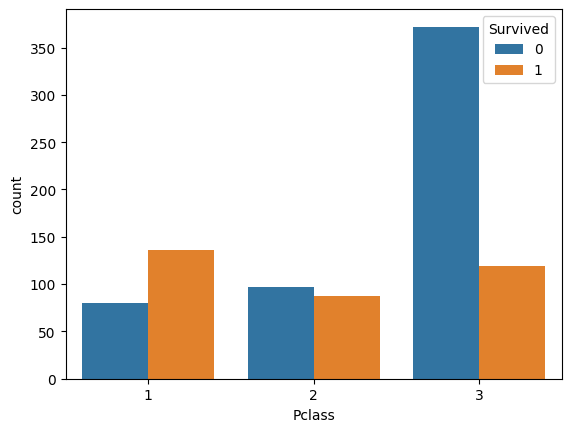

In [13]:
sns.countplot(data=train_data, x='Pclass', hue='Survived')

<Axes: xlabel='SibSp', ylabel='count'>

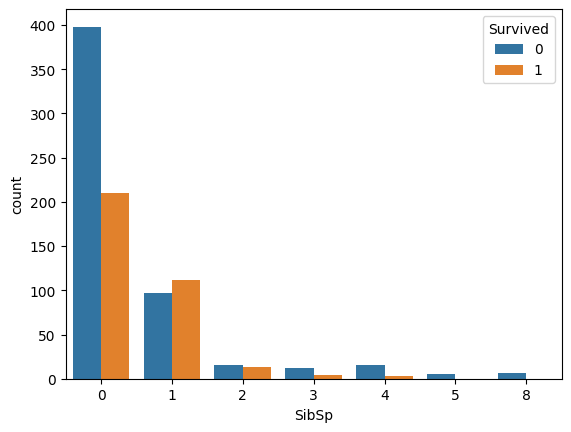

In [14]:
sns.countplot(data=train_data, x='SibSp', hue='Survived')

<Axes: xlabel='Parch', ylabel='count'>

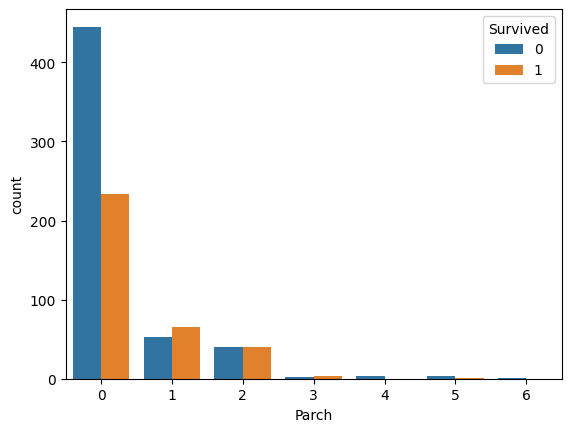

In [15]:
sns.countplot(data=train_data, x='Parch', hue='Survived')

<Axes: xlabel='Pclass', ylabel='Fare'>

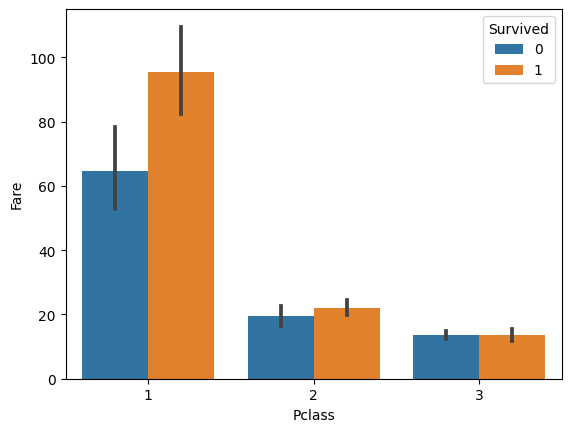

In [16]:
sns.barplot(data=train_data, x='Pclass', y='Fare', hue='Survived')

In [17]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Handling missing values

In [18]:
print('Missing train_data: \n', train_data.isna().sum())
print('\n Missing test_data: \n', test_data.isna().sum())

Missing train_data: 
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

 Missing test_data: 
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [19]:
#Handling missing values in both training and testing data
mean_age = train_data['Age'].mean() #Calculating mean age
mean_fare = train_data['Fare'].mean() #Calculating mean fare
train_data['Age'] = train_data['Age'].fillna(mean_age) #Filling missing values in training data with mean_age
test_data['Age'] = test_data['Age'].fillna(mean_age)#Filling missing values in testing data with mean_age
test_data['Fare'] = test_data['Fare'].fillna(mean_fare) #Filling missing values in testing data with mean_fare
train_data['Embarked'] = train_data['Embarked'].fillna('S') #S is the most frequent

In [20]:
#Dropping columns with too many missing values
train_data = train_data.copy()
test_data = test_data.copy()
train_data = train_data.drop(['Cabin'], axis=1)
test_data = test_data.drop(['Cabin'], axis=1)
print('Missing train_data: \n', train_data.isna().sum())
print('\n Missing test_data: \n', test_data.isna().sum())

Missing train_data: 
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

 Missing test_data: 
 PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


# Feature engineering 

In [21]:
#Creating a feature family_size from Parch and SibSP
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1
test_data['FamilySize'] = test_data['SibSp'] + test_data['Parch'] + 1

In [22]:
titles_train = train_data['Name'].str.split(expand=True, pat=',')[1].str.split(pat='.', expand=True)[0]
titles_test = test_data['Name'].str.split(expand=True, pat=',')[1].str.split(pat='.', expand=True)[0]
train_data['Rank'] = titles_train
test_data['Rank'] = titles_test

In [23]:
train_data['Rank'] = train_data['Rank'].str.strip()
test_data['Rank'] = test_data['Rank'].str.strip()

In [24]:
# Grouping similar titles together
title_mapping = {
    'Mr': 'Commoner',
    'Mrs': 'Commoner',
    'Master': 'Commoner',
    'Miss': 'Commoner',
    'Mlle': 'Commoner',
    'Ms': 'Commoner',
    'Mme': 'Commoner',
    'Dr': 'Proffesional',
    'Rev': 'Clergy',
    'Major': 'Military',
    'Col': 'Military',
    'Capt': 'Military',
    'Sir': 'Nobility',
    'Jonkheer': 'Nobility',
    'Don': 'Nobility',
    'Lady': 'Nobility',
    'the Countess': 'Nobility',
    'Dona': 'Nobility'
}

train_data['Rank_Value'] = train_data['Rank'].replace(title_mapping)
test_data['Rank_Value'] = test_data['Rank'].replace(title_mapping)

# Print the count of each title to check the result
print(train_data['Rank_Value'].value_counts())


Rank_Value
Commoner        868
Proffesional      7
Clergy            6
Nobility          5
Military          5
Name: count, dtype: int64


In [25]:
print(test_data['Rank_Value'].value_counts())

Rank_Value
Commoner        412
Military          2
Clergy            2
Proffesional      1
Nobility          1
Name: count, dtype: int64


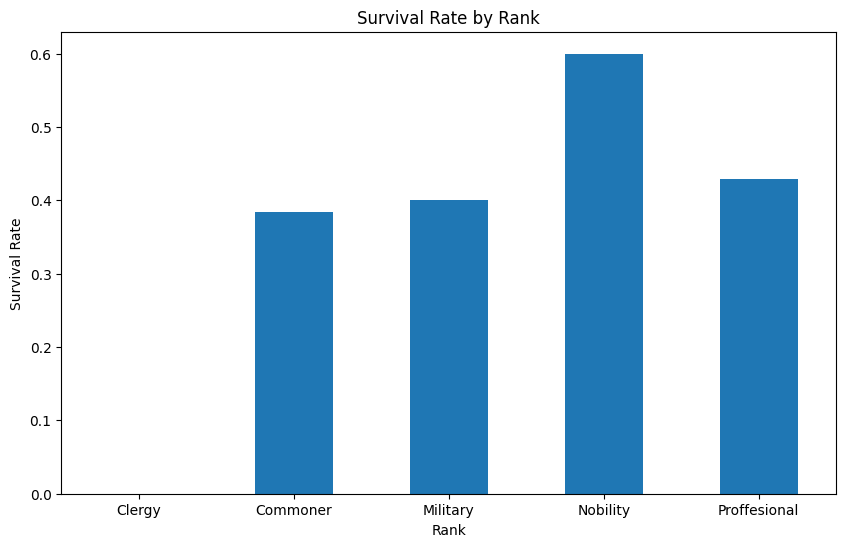

In [26]:
survival_by_rank = train_data.groupby('Rank_Value')['Survived'].mean()

# Plotting the survival rates
plt.figure(figsize=(10, 6))
survival_by_rank.plot(kind='bar')
plt.title('Survival Rate by Rank')
plt.xlabel('Rank')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0)
plt.show()

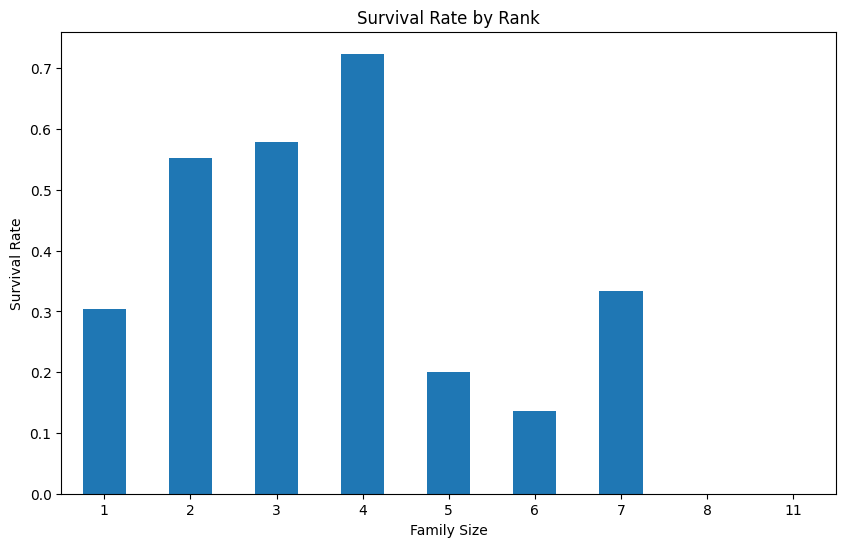

In [27]:
survival_by_famsize = train_data.groupby('FamilySize')['Survived'].mean()
# Plotting the survival rates
plt.figure(figsize=(10, 6))
survival_by_famsize.plot(kind='bar')
plt.title('Survival Rate by Rank')
plt.xlabel('Family Size')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0)
plt.show()

In [28]:
test_data.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
FamilySize     0
Rank           0
Rank_Value     0
dtype: int64

# Model building

In [29]:
#Drop passenger ID, name and ticket columns
train_data = train_data.drop(['PassengerId'], axis=1)
train_data = train_data.drop(['Name'], axis=1)
train_data = train_data.drop(['Ticket'], axis=1)

In [30]:
train_data['Sex'] = train_data['Sex'].map({'male': 1, 'female': 2})
train_data['Embarked'] = train_data['Embarked'].map({'Q': 1, 'C': 2, 'S':3})
train_data['Rank'] = train_data['Rank'].map({
    'Mr': 0, 'Mrs': 1, 'Miss': 2, 'Master': 3, 'Don': 4, 'Rev': 5, 'Dr': 6,
    'Mme': 7, 'Ms': 8, 'Major': 9, 'Lady': 10, 'Sir': 11, 'Mlle': 12,
    'Col': 13, 'Capt': 14, 'the Countess': 15, 'Jonkheer': 16
}
)
train_data['Rank_Value'] = train_data['Rank_Value'].map({
    'Commoner': 0,
    'Nobility': 1,
    'Clergy': 2,
    'Professional': 3,
    'Military': 4
}
) 

In [31]:
train_data['Rank_Value'] = train_data['Rank_Value'].fillna(3)

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
scaler = StandardScaler()

In [34]:
train_data['Fare'] = scaler.fit_transform(train_data[['Fare']])
train_data['Age'] = scaler.fit_transform(train_data[['Age']])
train_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Rank,Rank_Value
0,0,3,1,-0.592481,1,0,-0.502445,3,2,0,0.0
1,1,1,2,0.638789,1,0,0.786845,2,2,1,0.0
2,1,3,2,-0.284663,0,0,-0.488854,3,1,2,0.0
3,1,1,2,0.407926,1,0,0.420730,3,2,1,0.0
4,0,3,1,0.407926,0,0,-0.486337,3,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,-0.207709,0,0,-0.386671,3,1,5,2.0
887,1,1,2,-0.823344,0,0,-0.044381,3,1,2,0.0
888,0,3,2,0.000000,1,2,-0.176263,3,4,2,0.0
889,1,1,1,-0.284663,0,0,-0.044381,2,1,0,0.0


In [35]:
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,Rank,Rank_Value
0,892,3,"Kelly, Mr. James",male,34.500000,0,0,330911,7.8292,Q,1,Mr,Commoner
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.000000,1,0,363272,7.0000,S,2,Mrs,Commoner
2,894,2,"Myles, Mr. Thomas Francis",male,62.000000,0,0,240276,9.6875,Q,1,Mr,Commoner
3,895,3,"Wirz, Mr. Albert",male,27.000000,0,0,315154,8.6625,S,1,Mr,Commoner
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.000000,1,1,3101298,12.2875,S,3,Mrs,Commoner
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,29.699118,0,0,A.5. 3236,8.0500,S,1,Mr,Commoner
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C,1,Dona,Nobility
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,S,1,Mr,Commoner
416,1308,3,"Ware, Mr. Frederick",male,29.699118,0,0,359309,8.0500,S,1,Mr,Commoner


In [36]:
passengerids = test_data['PassengerId']
test_data = test_data.drop(['PassengerId'], axis=1)
test_data = test_data.drop(['Name'], axis=1)
test_data = test_data.drop(['Ticket'], axis=1)

In [37]:
test_data['Sex'] = test_data['Sex'].map({'male': 1, 'female': 2})
test_data['Embarked'] = test_data['Embarked'].map({'Q': 1, 'C': 2, 'S':3})
test_data['Rank'] = test_data['Rank'].map({
    'Mr': 0, 'Mrs': 1, 'Miss': 2, 'Master': 3, 'Don': 4, 'Rev': 5, 'Dr': 6,
    'Mme': 7, 'Ms': 8, 'Major': 9, 'Lady': 10, 'Sir': 11, 'Mlle': 12,
    'Col': 13, 'Capt': 14, 'the Countess': 15, 'Jonkheer': 16
}
)
test_data['Rank_Value'] = test_data['Rank_Value'].map({
    'Commoner': 0,
    'Nobility': 1,
    'Clergy': 2,
    'Professional': 3,
    'Military': 4
}
) 

In [38]:
test_data['Rank'] = test_data['Rank'].fillna(4)
test_data['Rank_Value'] = test_data['Rank_Value'].fillna(1)

In [39]:
test_data['Fare'] = scaler.fit_transform(test_data[['Fare']])
test_data['Age'] = scaler.fit_transform(test_data[['Age']])
test_data

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Rank,Rank_Value
0,3,1,0.344284,0,0,-0.498258,1,1,0.0,0.0
1,3,2,1.334655,1,0,-0.513125,3,2,1.0,0.0
2,2,1,2.523099,0,0,-0.464940,1,1,0.0,0.0
3,3,1,-0.249938,0,0,-0.483317,3,1,0.0,0.0
4,3,2,-0.646086,1,1,-0.418323,3,3,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
413,3,1,-0.036088,0,0,-0.494299,3,1,0.0,0.0
414,1,2,0.700817,0,0,1.313894,2,1,4.0,1.0
415,3,1,0.661203,0,0,-0.508643,3,1,0.0,0.0
416,3,1,-0.036088,0,0,-0.494299,3,1,0.0,0.0


In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [41]:
# Assuming df is your DataFrame with features and target

# Features and target variable
X = train_data.drop('Survived', axis=1)
y = train_data['Survived']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [42]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1])

In [43]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

report = classification_report(y_test, y_pred)
print('Classification Report:\n', report)

conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', conf_matrix)

Accuracy: 0.7988826815642458
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179

Confusion Matrix:
 [[89 16]
 [20 54]]


In [44]:
predictions=model.predict(test_data)
predictions

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [45]:
predictions_df = pd.DataFrame(predictions)
predictions_df


,0
0,0
1,0
2,0
3,0
4,0
...,...
413,0
414,1
415,0
416,0


In [46]:
passengerids = pd.DataFrame(passengerids)
passengerids['Survived'] = predictions_df

In [47]:
passengerids

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [48]:
#passengerids.to_csv('submission.csv', index=False)
#print('Done')

Done


In [49]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'lbfgs']
}

# Instantiate and fit GridSearchCV
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Best Parameters: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Score: 0.8117502216093765


/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solve

In [56]:
grid_search_predictions = grid_search.predict(test_data)

In [59]:
df = pd.read_csv('/kaggle/input/titanic-data/test.csv')
df_submission = df['PassengerId']
submissionGS = pd.DataFrame(df_submission)
submissionGS['Prediction'] = grid_search_predictions
submissionGS

,PassengerId,Prediction
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [63]:
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)
predictions = model_dt.predict(test_data)

In [64]:
submissionGS['Survived'] = predictions

In [66]:
submission_dt = submissionGS.drop(['Prediction'], axis=1)

In [68]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)
predictions = model.predict(test_data)

In [70]:
submissionGS['Survived'] = predictions
submissionGS
submission_RF = submissionGS.drop(['Prediction'], axis=1)


In [73]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()
model.fit(X_train, y_train)
predictions = model.predict(test_data)

submissionGS['Survived'] = predictions
submissionGS
submission_GBC = submissionGS.drop(['Prediction'], axis=1)

In [74]:
submission_GBC.to_csv('submission.csv', index=False)

In [75]:
from sklearn.metrics import classification_report

# Train the Gradient Boosting Classifier
model = GradientBoostingClassifier()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Generate and print the classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       105
           1       0.79      0.77      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179

